In [26]:
import pandas_gbq
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [27]:
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])


In [8]:
with open('app/SQL/Query_traer_clientes_simplificado.sql') as file:
    query=file.read()
data=pandas_gbq.read_gbq(query, project_id='customer-experience-384423',progress_bar_type=None)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250209 entries, 0 to 250208
Data columns (total 62 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_cliente                         250209 non-null  float64
 1   promedio_compra                    250209 non-null  float64
 2   contactable                        250209 non-null  float64
 3   compro_en_OUTLET                   250209 non-null  float64
 4   compro_en_ESTELAR                  250209 non-null  float64
 5   compro_en_MOVIES                   250209 non-null  float64
 6   compro_en_LITTLE_MIC               250209 non-null  float64
 7   compro_en_MOVIES_W                 250209 non-null  float64
 8   compro_en_OUTLET_MIC               250209 non-null  float64
 9   compro_en_EVENTOS                  250209 non-null  float64
 10  compro_en_OUTLET_LITTLE_MIC        250209 non-null  float64
 11  compro_en_ESTELAR_ECUADOR          2502

In [28]:
data = data.dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


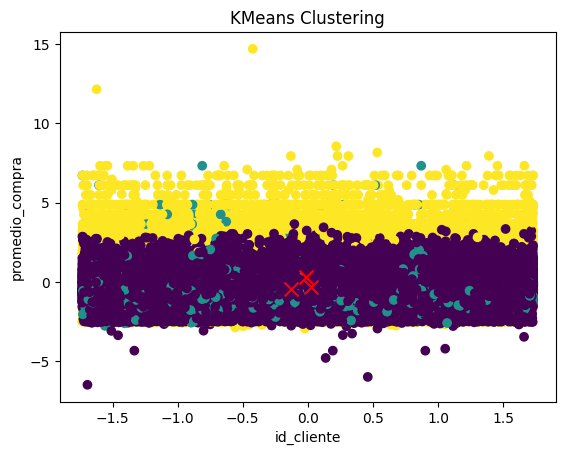

In [13]:
plt.scatter(data['id_cliente'], data['promedio_compra'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)  # Highlight centroids in red with 'x' marker
plt.xlabel('id_cliente')
plt.ylabel('promedio_compra')
plt.title('KMeans Clustering')
plt.show()

In [30]:
cluster_range = range(1, 40)  
inertias = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans Clustering')
plt.show()